### Perfroming classification on car dataset using decision tree

Dataset complete info:'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
## Attribute information
1. Class Values:  unacc, acc, good, vgood

### Attributes:

2. buying: vhigh, high, med, low.
3. maint: vhigh, high, med, low.
4. doors: 2, 3, 4, 5more.
5. persons: 2, 4, more.
6. lug_boot: small, med, big.
7. safety: low, med, high.

In [5]:
car_data ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'


In [7]:
import pandas as pd
pd.read_csv(car_data,header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [9]:
column =['buying','maint','doors','persons','lug_boot','safety','Class Values']

In [11]:
df = pd.read_csv(car_data,names=column)
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   Class Values  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [46]:
import category_encoders
from category_encoders import OrdinalEncoder 


In [47]:
oe = OrdinalEncoder()

In [48]:
oe.fit(df)

OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',
                     'safety', 'Class Values'],
               mapping=[{'col': 'buying', 'data_type': dtype('O'),
                         'mapping': vhigh    1
high     2
med      3
low      4
NaN     -2
dtype: int64},
                        {'col': 'maint', 'data_type': dtype('O'),
                         'mapping': vhigh    1
high     2
med      3
low      4
NaN     -2
dtype: int64},
                        {'col': 'doors', 'data_type': dtype('O'),
                         'mapping': 2        1
3        2
4        3
5more    4
NaN     -2
dtype: int64},
                        {'col': 'persons', 'data_type': dtype('O'),
                         'mapping': 2       1
4       2
more    3
NaN    -2
dtype: int64},
                        {'col': 'lug_boot', 'data_type': dtype('O'),
                         'mapping': small    1
med      2
big      3
NaN     -2
dtype: int64},
                        {'col': 'safety'

In [59]:
new_df= oe.transform(df)

In [60]:
new_df['lug_boot'].unique()

array([1, 2, 3])

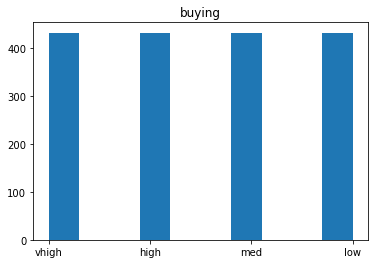

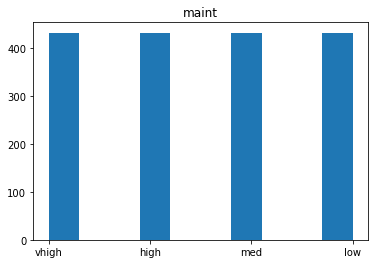

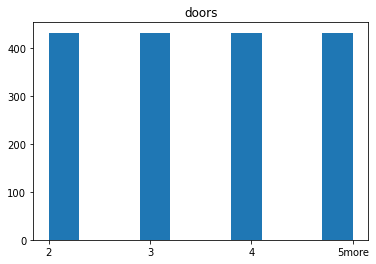

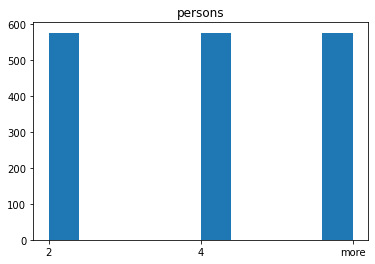

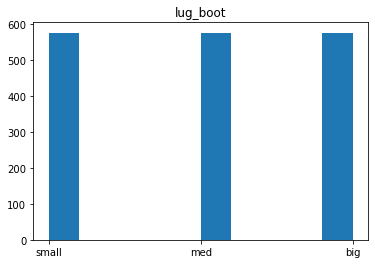

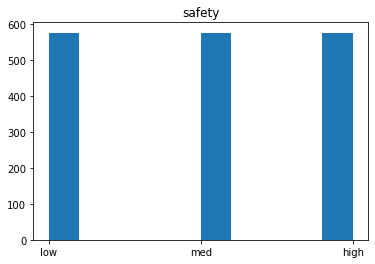

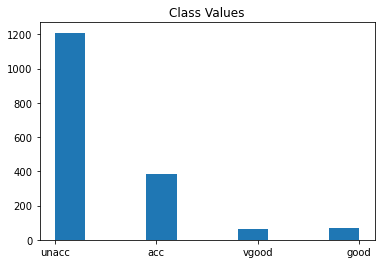

In [56]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [89]:
df['Class Values'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class Values, dtype: int64

In [61]:
X, y = new_df.iloc[:, :-1], new_df.iloc[:, -1]

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [82]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

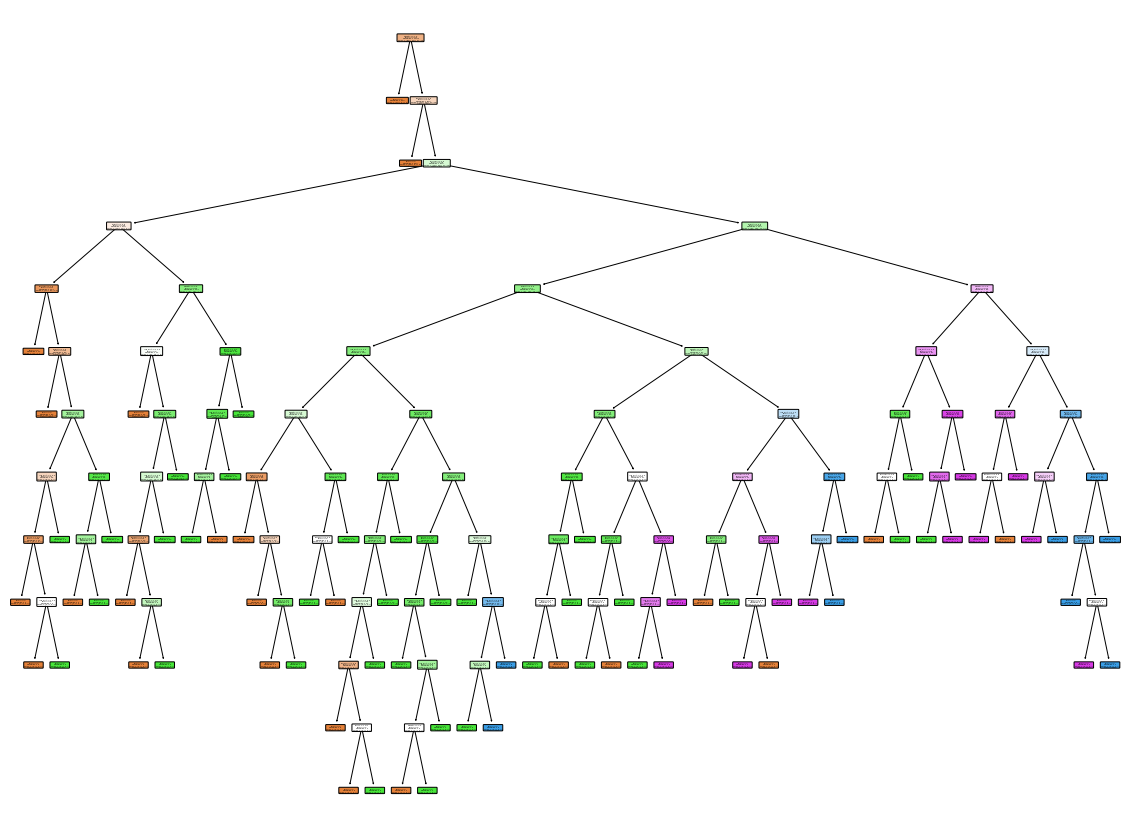

In [83]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=["unacc", "acc", "good", "vgood"],
          feature_names=new_df.columns)
plt.show()

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


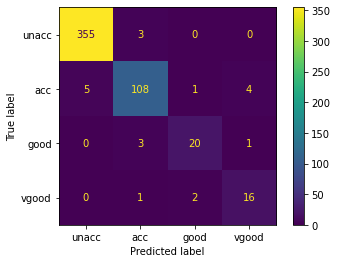

In [84]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=["unacc", "acc", "good", "vgood"])

In [92]:
y_test.value_counts()

1    358
2    118
3     24
4     19
Name: Class Values, dtype: int64

In [109]:
clf2 = DecisionTreeClassifier(random_state=42,max_depth=6)
clf2= clf2.fit(X_train, y_train)

In [130]:
prediction =clf2.predict(X_test)
prediction

array([1, 4, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2,
       3, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 4, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [131]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           1       1.00      0.95      0.97       358
           2       0.80      0.90      0.85       118
           3       0.66      0.88      0.75        24
           4       0.67      0.53      0.59        19

    accuracy                           0.92       519
   macro avg       0.78      0.81      0.79       519
weighted avg       0.93      0.92      0.92       519



C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


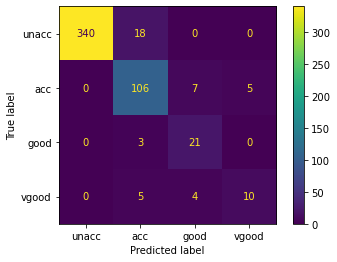

In [110]:
plot_confusion_matrix(clf2, X_test, y_test, display_labels=["unacc", "acc", "good", "vgood"])

In [116]:
parameters = { 'criterion': ( 'gini' , 'entropy') , 'max_depth' :[4,6,10,12]  }

In [117]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters)

In [118]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [4, 6, 10, 12]})

In [128]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004996,0.000633,0.003197,0.000980,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.876033,0.859504,0.904959,0.859504,0.834025,0.866805,0.023332,7
1,0.003598,0.001020,0.002800,0.000748,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.917355,0.909091,0.942149,0.892562,0.917012,0.915634,0.016019,6
2,0.003597,0.000799,0.002998,0.001414,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.962810,0.954545,0.962810,0.975207,0.962656,0.963606,0.006616,4
3,0.003800,0.000749,0.001797,0.000399,gini,12,"{'criterion': 'gini', 'max_depth': 12}",0.962810,0.958678,0.971074,0.979339,0.962656,0.966911,0.007409,3
4,0.003798,0.001600,0.001798,0.000748,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.859504,0.847107,0.892562,0.805785,0.834025,0.847797,0.028622,8
5,0.008993,0.010519,0.002599,0.001356,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.942149,0.929752,0.946281,0.904959,0.925311,0.929690,0.014569,5
6,0.003198,0.000748,0.001799,0.000748,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.971074,0.975207,0.971074,0.975207,0.962656,0.971044,0.004583,2
7,0.003598,0.001200,0.001799,0.000748,entropy,12,"{'criterion': 'entropy', 'max_depth': 12}",0.971074,0.971074,0.971074,0.979339,0.966805,0.971873,0.004083,1


In [120]:
tuned_model = grid_search.best_estimator_
print(grid_search.best_score_)
tuned_model

0.9718733925448373


DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)